In [3]:
import os

#tensorflow backend for string input
os.environ['KERAS_BACKEND']='tensorflow'

import pathlib
import numpy as np
import tensorflow.data as tf_data
import keras 
from keras import layers



In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas 
from mpl_toolkits.mplot3d import Axes3D


In [6]:
import numpy as np 
import pandas as pd 

data_imdb=pd.read_csv('C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/imdb_labelled.txt', delimiter='\t',header=None)

In [9]:
data_imdb.columns=['Review_text','Review class']
data_imdb


,Review_text,Review class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [10]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
def clean_text(df):
    all_reviews=list()
    lines=df['Review_text'].values.tolist()
    for text in lines:
        text=text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text=pattern.sub('',text)
        text=re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]",'', text)
        tokens=word_tokenize(text)
        table=str.maketrans('','',string.punctuation)
        stripped=[w.translate(table) for w in tokens]
        words=[word for word in stripped if word.isalpha()]
        stop_words=set(stopwords.words('english'))
        stop_words.discard('not')
        PS=PorterStemmer()
        words=[PS.stem(w) for w in words if not w in stop_words]
        words=' '.join(words)
        all_reviews.append(words)


    return all_reviews

all_reviews=clean_text(data_imdb)



In [25]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(min_df=3)
X=CV.fit_transform(all_reviews).toarray()
y=data_imdb['Review class'].to_numpy()



In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score
print(accuracy_score(y_test,y_pred))


0.7


In [37]:
########

In [4]:
my_vocab = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

import gensim
from sklearn.manifold import TSNE 

import gensim.downloader as api

glove_model=api.load('glove-wiki-gigaword-300')

glove_model.most_similar('love',topn=5)

[==================================================] 100.0% 376.1/376.1MB downloaded


[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256)]

In [8]:
words=[]
vectors=[]

for word in my_vocab:
    words.append(word)
    vectors.append(glove_model[word])
    

In [13]:
len(vectors[2])

300

In [14]:
dicts=zip(words,vectors)

In [15]:
dicts

In [17]:
import pandas as pd
pd.DataFrame(dicts)

,0,1
0,apple,"[-0.20842, -0.019668, 0.063981, -0.71403, -0.2..."
1,orange,"[-0.24776, -0.12359, 0.20986, -0.15834, -0.158..."
2,shimla,"[-0.083216, -0.235, 0.34561, 0.082819, 0.41372..."
3,banana,"[0.42141, 0.020467, 0.12666, 0.39762, -0.11016..."
4,maruti,"[-0.097778, 0.39619, -0.1984, 0.12019, 0.47573..."
5,mumbai,"[-0.25335, -0.41384, 0.15746, 0.23978, 0.09889..."
6,china,"[-0.11286, 0.033802, -0.2941, -0.75285, 0.0542..."
7,india,"[-0.11337, -0.57114, 0.070453, -0.36241, -0.05..."
8,husband,"[-0.2866, -0.32581, -0.051729, -0.21017, -0.03..."
9,wife,"[-0.62203, -0.091568, -0.45238, -0.45005, 0.12..."


In [18]:
dim_model=TSNE(n_components=2,perplexity=3,init='pca',random_state=45)


C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


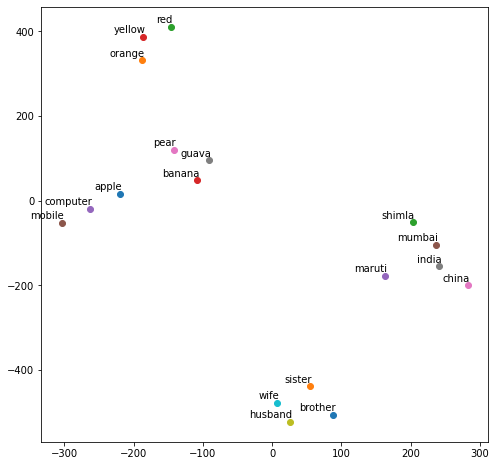

In [23]:
fit_model=dim_model.fit_transform(vectors)

import matplotlib.pyplot as plt

X=[]
y=[]

for i in fit_model:
    X.append(i[0])
    y.append(i[1])

plt.figure(figsize=(8,8))
for i in range(len(X)):
    plt.scatter(X[i],y[i])
    plt.annotate(words[i],xy=(X[i],y[i]),xytext=(2,2),textcoords='offset points',
                 ha='right',
                 va='bottom')


In [24]:
###

# word2vec model

In [ ]:
import os
import re 
import sys
import numpy as np
import pandas as pd